<a href="https://colab.research.google.com/github/JeevishaShukla/AIMLMonth2023/blob/main/MAJOR_PROJECT_python_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAJOR PROJECT

## AI in ROBOTICS

###( Robot Kinematics Dataset )
#PROBLEM STATEMENT:
###Develop a machine learning algorithm to discern distinct movement patterns exhibited by the robotic arm based on the joint angle sequences. Categorize and label these patterns to enable the robot to execute predefined movements more effectively.

In [ ]:
!pip install pandas numpy tensorflow

In [ ]:

!pip install roboticstoolbox-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.0/187.0 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.4 MB/s eta 0:00:00
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9610 sha256=835ae23e88d9c8e78bcdd22f22d455c2d3970df42d7d1d9267be86ef8090ee8b
  Stored in directory: /root/.cache/pip/wheels/a2/68/5f/c339b20a41659d856c93ccdce6a33095493eb82c3964aac5a1
  Created wheel for rtb-data: filename=rtb_data-1.0.1-py3-none-any.whl size=115135909 sha256=9c1be8a1ee402ba2eea84f89d01e0fec54faa6bd7ec2d57b9b8b92bbd93693ca
  Stored in director

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
d = pd.read_csv("/robot_inverse_kinematics_dataset.csv")

In [ ]:
d

,q1,q2,q3,q4,q5,q6,x,y,z
0,-1.510,-0.763,1.85,-0.817,0.9120,2.320,-0.0947,0.15000,0.301
1,-2.840,0.520,1.58,-1.270,-1.3900,0.617,0.1420,-0.10000,0.225
2,-1.230,0.695,1.22,-1.130,0.0343,6.270,-0.0833,0.22300,0.206
3,-1.990,1.060,1.74,-1.760,-1.2400,4.760,0.1350,-0.03140,0.370
4,1.050,0.836,1.34,-1.890,0.4840,4.380,-0.0560,-0.22900,0.260
...,...,...,...,...,...,...,...,...,...
14995,0.314,-0.534,1.76,1.970,-0.6990,3.870,-0.1130,-0.12800,0.257
14996,2.450,1.360,1.55,2.780,-0.3210,5.310,0.0633,-0.03160,0.450
14997,2.620,1.410,1.56,2.540,1.0600,5.870,0.1310,-0.16000,0.362
14998,-1.890,1.850,1.51,1.090,0.6970,4.070,0.0829,-0.01600,0.441


# **TASK 1** : Feature Extraction
### Time series representation transform the joint angle sequences into a suitable format for analysis  considering the temporal of nature of the data.


In [ ]:
joint_angles = np.random.rand(100, 6)
def create_time_series(data, sequence_length):
    time_series = []
    for i in range(len(data) - sequence_length + 1):
        time_series.append(data[i : i + sequence_length])
    return np.array(time_series)

sequence_length = 10
time_series_data = create_time_series(joint_angles, sequence_length)

print("Time Series Data Shape:", time_series_data.shape)

Time Series Data Shape: (91, 10, 6)


#***SUMMARY FOR THE CODE :***
####*The code helps turn sets of joint angle movements into sequences of those movements over time, making it easier to study how the movements change together.*

# **TASK 2:** Robotic Arm Position Prediction using Neural Networks







In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

d=pd.read_csv("/robot_inverse_kinematics_dataset.csv")

X = d[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']].values
y = d[['x', 'y', 'z']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    layers.Input(shape=(6,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(3)
])

model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
predictions = model.predict(X_test)


for i in range(10):
    print("Actual:", y_test[i], "Predicted:", predictions[i])



Epoch 1/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0091 - val_loss: 0.0060
Epoch 2/50
375/375 [==============================] - 1s 1ms/step - loss: 0.0044 - val_loss: 0.0036
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0025
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/50
375/375 [==============================] - 0s 1ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 7/50
375/375 [==============================] - 1s 1ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 8/50
375/375 [==============================] - 1s 1ms/step - loss: 9.5973e-04 - val_loss: 0.0010
Epoch 9/50
375/375 [==============================] - 1s 1ms/step - loss: 8.3226e-04 - val_loss: 8.7081e-04
Epoch 10/50
375/375 [==============================] - 0s 1ms/step - loss: 7.2939e-04 - 

###***SUMMARY FOR THE CODE :***
####*The provided code loads a dataset containing joint angles and coordinates of a robotic arm's movements. After preparing the data, it constructs a neural network with two hidden layers, training it to predict the arm's position based on the input joint angles. Throughout the training process, the code monitors the model's advancement and assesses its performance using the mean squared error. The results include the loss values encountered during training and a side-by-side comparison of predicted coordinates with the actual coordinates for selected test cases, facilitating an evaluation of the model's effectiveness in predicting the arm's spatial locations.*

# **TASK 3** : K-Nearest Neighbors for Robotic Arm Position Prediction



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.preprocessing import StandardScaler

d = pd.read_csv("/robot_inverse_kinematics_dataset.csv")

X = d[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']].values
y = d[['x', 'y', 'z']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train[:, 0])
predictions = knn_model.predict(X_test)
mse = mean_squared_error(y_test[:, 0], predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.0015388254900960032


###***SUMMARY FOR THE CODE :***
####*This code utilizes K-Nearest Neighbors to predict robotic arm x-coordinates based on joint angles. The model is trained, evaluated using mean squared error, and performance is assessed on a given dataset.*

### **TASK 4**: Utilize the Linear Regression model to predict optimal x-coordinates of a robotic arm's movements based on joint angles, enhancing its positioning accuracy for efficient control in manufacturing processes.

In [ ]:
X = d[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']].values
y = d[['x', 'y', 'z']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 0.00942595334611007


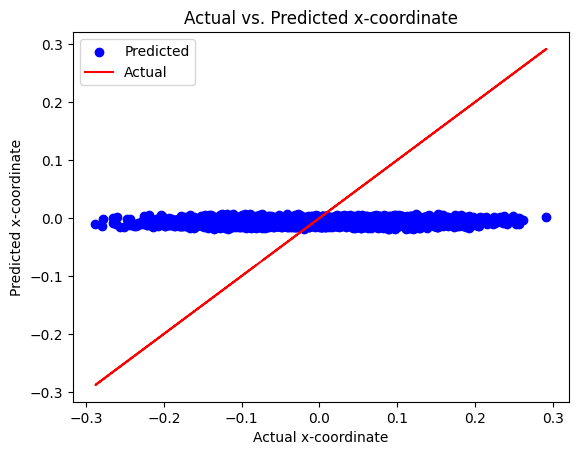

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)


mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

plt.scatter(y_test[:, 0], predictions[:, 0], color='blue', label='Predicted')
plt.plot(y_test[:, 0], y_test[:, 0], color='red', label='Actual')
plt.xlabel('Actual x-coordinate')
plt.ylabel('Predicted x-coordinate')
plt.title('Actual vs. Predicted x-coordinate')
plt.legend()
plt.show()

###***SUMMARY FOR THE CODE :***
####*This code segment involves splitting a dataset into training and testing sets. It then employs a Linear Regression model to predict x-coordinates based on joint angles, assessing the model's performance using mean squared error. The script further generates a scatter plot to visualize the correspondence between predicted and actual x-coordinates, enabling a visual evaluation of the model's predictive accuracy.*

# **TASK 5** :Clustering Analysis with K-Means
### In this task, K-Means clustering is applied to the robotic arm joint angles to identify patterns or groups in the data


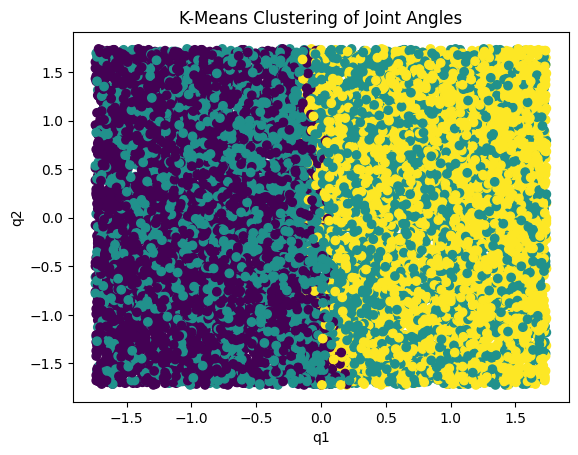

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

d = pd.read_csv("/robot_inverse_kinematics_dataset.csv")


X = d[['q1', 'q2', 'q3', 'q4', 'q5', 'q6']].values


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


num_clusters = 3


kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)


cluster_assignments = kmeans_model.fit_predict(X_scaled)


plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_assignments, cmap='viridis')
plt.xlabel('q1')
plt.ylabel('q2')
plt.title('K-Means Clustering of Joint Angles')
plt.show()


###***SUMMARY FOR THE CODE :***
####*The provided code demonstrates the procedure with our dataset. Adjust the number of clusters as needed and replace the dataset path accordingly. The scatter plot illustrates how joint angles are grouped based on similarity.*






#*CONCLUSION*
*In this major project on Python and machine learning, we explored various techniques to enhance the control and precision of a robotic arm's movements. We started with time series representation and feature extraction of joint angles, followed by building a neural network model to predict arm positions. Additionally, we leveraged K-Nearest Neighbors to predict x-coordinates and utilized Linear Regression for improved positioning accuracy. Clustering analysis using K-Means helped us identify patterns in joint angles. Through these tasks, we gained insights into optimizing the arm's movements for efficient manufacturing processes.*




